In [1]:
import time
import numpy as np
rng = np.random.default_rng()
from numpy import random
import math
from numpy import inf

In [2]:
def fun(X):
    output = sum(np.square(X))
    return output

In [3]:
def COOT(N,Max_iter,lb,ub,dim,fobj):
    NLeader=math.ceil(0.1*N)
    Ncoot=N-NLeader
    Convergence_curve = np.zeros([Max_iter,1])
    gBest=np.zeros([1,dim])
    gBestScore=inf
#Initialize the positions of Coots
    CootPos=np.multiply(random.rand(Ncoot,dim),(ub-lb))+lb
    CootFitness=np.zeros([1,Ncoot])
#Initialize the locations of Leaders
    LeaderPos=np.multiply(random.rand(NLeader,dim),(ub-lb))+lb
    LeaderFit=np.zeros([1,NLeader])
  # CootFitness
    for i in range(np.size(CootPos,0)):
      CootFitness[0,i]=fobj(CootPos[i,:])
      if gBestScore>CootFitness[0,i]:
        gBestScore=CootFitness[0,i]
        gBest=CootPos[i,:]

  # LeaderFitness
    for i in range(np.size(LeaderPos,0)):  
      LeaderFit[0,i]=fobj(LeaderPos[i,:])
      if(gBestScore>LeaderFit[0,i]):
          gBestScore=LeaderFit[0,i]
          gBest=LeaderPos[i,:]


    Convergence_curve[0]=gBestScore
# Loop counter
    for l in range(Max_iter):

      B=2-l*(1/Max_iter)
      A=1-l*(1/Max_iter)
      for i in range(np.size(CootPos,0)): 
        if random.rand()<0.5:
          R=-1+2*random.rand()
          R1=random.rand();
        else:  
          R=-1+2*random.rand(1,dim)
          R1=random.rand(1,dim)

        k=math.fmod(i,NLeader)
        k=math.floor(k)
        if random.rand()<0.5:
          r1=2*np.multiply(R1,np.cos(2*math.pi*R))           #|| i==1
          CootPos[i,:]=np.multiply(r1,(LeaderPos[k,:]-CootPos[i,:]))+LeaderPos[k,:]
             # Check boundries
          Tp=CootPos[i,:]>ub
          Tm=CootPos[i,:]<lb
          CootPos[i,:]=np.multiply(CootPos[i,:],(~(Tp+Tm)))+np.multiply(ub,Tp)+np.multiply(lb,Tm)
        else:
              if random.rand()<0.5 and not i==1:      #i>2*size(CootPos,1)/3%
                CootPos[i,:]=(CootPos[i,:]+CootPos[i-1,:])/2
              else:
                Q=np.multiply(random.rand(1,dim),(ub-lb))+lb
        #                 R1=0.2+ 0.6*rand;                
                CootPos[i,:]=CootPos[i,:]+A*np.multiply(R1,(Q-CootPos[i,:]))               

                Tp=CootPos[i,:]>ub
                Tm=CootPos[i,:]<lb
                CootPos[i,:]=np.multiply(CootPos[i,:],(~(Tp+Tm)))+np.multiply(ub,Tp)+np.multiply(lb,Tm)  


        # fitness of location of Coots
      for i in range(np.size(CootPos,0)):
        CootFitness[0,i]=fobj(CootPos[i,:])
        k=math.fmod(i,NLeader)
        k=math.floor(k) 
        # Update the location of coot
        if CootFitness[0,i]<LeaderFit[0,k]:
          Temp=LeaderPos[k,:]
          TemFit= LeaderFit[0,k]
          LeaderFit[0,k]= CootFitness[0,i]
          LeaderPos[k,:]=CootPos[i,:]
          CootFitness[0,i]=TemFit
          CootPos[i,:]=Temp      


        # fitness of location of Leaders
      for i in range(np.size(LeaderPos,0)):
                if random.rand()<0.5:
                  R=-1+2*random.rand()
                  R3=random.rand()
                else:  
                  R=-1+2*random.rand(1,dim)
                  R3=random.rand(1,dim)

                if random.rand()<0.5:
                  r2=B*np.multiply(R3,np.cos(2*math.pi*R))           
                  Temp=np.multiply(r2,(gBest-LeaderPos[i,:]))+gBest           
                else:    
                  r2=B*np.multiply(R3,np.cos(2*math.pi*R))       
                  Temp=np.multiply(r2,(gBest-LeaderPos[i,:]))-gBest         
   

                
                if  Temp[0].size == 1:
                  temp =  Temp
                else:
                  temp =   Temp[0]
                Tp=temp>ub
                Tm=temp<lb
                Temp=np.multiply(temp,(~(Tp+Tm)))+np.multiply(ub,Tp)+np.multiply(lb,Tm)
                TempFit=fobj(Temp)
                  # Update the location of Leader
                if gBestScore>TempFit:
                  LeaderFit[0,i]=gBestScore
                  LeaderPos[i,:]=gBest
                  gBestScore=TempFit
                  gBest=Temp


    Convergence_curve[l]=gBestScore


    return Convergence_curve,gBest,gBestScore


In [4]:
'''The main function '''
 # Set relevant parameters.
time_start = time.time()
pop = 50                    # population size.
MaxIter = 100               # Maximum number of iterations.
dim = 20                    # The dimension.
fl=-100                     # The lower bound of the search interval.
ul=100                      # The upper bound of the search interval.
lb = fl*np.ones([1,dim])
ub = ul*np.ones([1,dim])
Convergence_curve,gBest,gBestScore=COOT(pop,MaxIter,fl,ul,dim,fun)
time_end = time.time()
print("The running time is: {time_end  - time_start } s")
print('The optimal value：',gBestScore)
print('The optimal solution：',gBest)

The running time is: {time_end  - time_start } s
The optimal value： 2.9801870675927765e-10
The optimal solution： [ 1.11728526e-06 -4.84188220e-06  4.72326313e-06  5.19037686e-06
  1.41764566e-06  2.85214846e-06 -7.59233402e-06 -4.16679621e-06
  1.30422413e-06 -8.07304702e-06  2.27545525e-06 -4.56918813e-06
  3.10677936e-06  1.15579514e-06 -2.04030686e-06 -9.75537282e-07
  2.55952537e-06  1.52507315e-06  3.69202790e-06  2.71777752e-06]


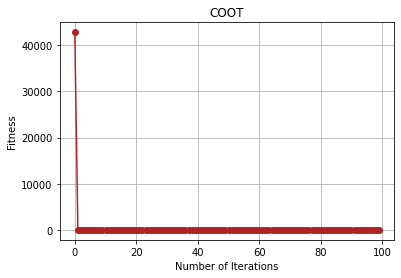

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot( Convergence_curve,color='firebrick', marker='o', markeredgecolor='firebrick', markerfacecolor='firebrick')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('COOT')
ax.grid()
plt.show()